In [14]:
import pandas as pd
from sklearn.utils import resample, shuffle
from sklearn.model_selection import train_test_split

In [2]:
train_values = pd.read_csv('../data/raw/train_values.csv')
train_labels = pd.read_csv('../data/raw/train_labels.csv')

In [3]:
train_join = train_values.set_index('building_id').join(train_labels.set_index('building_id'))

In [21]:
train_join.loc[:, train_join.columns != 'damage_grade']

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,n,r,n,...,0,0,0,0,0,0,0,0,0,0
669485,17,715,2060,2,0,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
602512,17,51,8163,3,55,6,7,t,r,q,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X_train, X_test, y_train, y_test = train_test_split(train_join.loc[:, train_join.columns != 'damage_grade'], train_join.loc[:, train_join.columns == 'damage_grade'], test_size=0.2, random_state=42)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(208480, 38)
(52121, 38)
(208480, 1)
(52121, 1)


In [27]:
y_train.head()

,damage_grade
building_id,
739427,2
17201,2
723805,3
891512,2
484350,3


In [28]:
X_train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
739427,13,257,8352,3,25,2,5,n,r,n,...,0,0,0,0,0,0,0,0,0,0
17201,6,1076,9202,3,40,10,8,o,r,n,...,0,0,1,0,0,0,0,0,0,0
723805,7,838,10723,2,45,8,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
891512,7,555,2763,2,30,7,4,t,r,n,...,0,0,0,0,0,0,0,0,0,0
484350,17,682,1039,3,30,6,7,t,r,q,...,0,0,0,0,0,0,0,0,0,0


In [29]:
train_join = X_train.join(y_train)

In [30]:
train_join.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,
739427,13,257,8352,3,25,2,5,n,r,n,...,0,0,0,0,0,0,0,0,0,2
17201,6,1076,9202,3,40,10,8,o,r,n,...,0,1,0,0,0,0,0,0,0,2
723805,7,838,10723,2,45,8,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
891512,7,555,2763,2,30,7,4,t,r,n,...,0,0,0,0,0,0,0,0,0,2
484350,17,682,1039,3,30,6,7,t,r,q,...,0,0,0,0,0,0,0,0,0,3


In [31]:
train_join.isna().sum().sum()

0

In [32]:
train_join.shape

(208480, 39)

<Axes: >

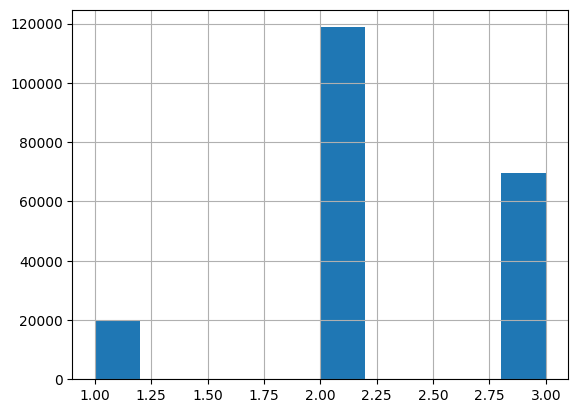

In [33]:
train_join.damage_grade.hist()

In [34]:
train_1 = train_join[train_join['damage_grade'] == 1]
train_3 = train_join[train_join['damage_grade'] == 3]

In [35]:
train_1.shape

(19954, 39)

In [36]:
train_3.shape

(69754, 39)

In [37]:
train_2 = train_join[train_join['damage_grade'] == 2]

In [39]:
train_2.shape[0]

118772

In [40]:
train_1_upsampled = resample(train_1, random_state=42, n_samples=train_2.shape[0], replace=True)

In [41]:
train_1_upsampled.shape

(118772, 39)

In [55]:
train_1_upsampled.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,
442372,1,1169,8874,2,20,10,5,t,r,n,...,0,0,0,0,0,0,0,0,0,1
829247,16,1012,11130,2,5,10,6,t,r,n,...,0,0,0,0,0,0,0,0,0,1
644075,26,264,453,2,5,8,5,t,r,q,...,0,0,0,0,0,0,0,0,0,1
545614,21,873,12384,1,10,4,3,t,w,n,...,1,0,0,0,0,0,0,0,0,1
610431,26,264,1846,2,0,10,5,t,w,q,...,0,0,0,0,0,0,0,0,0,1


In [42]:
train_3_upsampled = resample(train_3, random_state=42, n_samples=train_2.shape[0], replace=True)

In [43]:
train_3_upsampled.shape

(118772, 39)

In [59]:
train_upsampled = pd.concat([train_1_upsampled, train_2, train_3_upsampled])
train_upsampled = shuffle(train_upsampled)

In [60]:
train_upsampled.shape

(356316, 39)

In [61]:
train_upsampled.shape[0]/3

118772.0

In [62]:
X_train_upsampled = train_upsampled.loc[:, train_upsampled.columns != 'damage_grade']
y_train_upsampled = train_upsampled.loc[:, train_upsampled.columns == 'damage_grade']

In [63]:
X_train_upsampled.shape

(356316, 38)

In [64]:
X_train_upsampled.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
136232,13,531,6154,2,25,7,6,t,r,n,...,0,0,0,0,0,0,0,0,0,0
214014,17,876,12119,2,10,16,4,t,r,n,...,0,0,0,0,0,0,0,0,0,0
253233,10,603,4355,3,20,5,5,t,h,n,...,0,0,0,0,0,0,0,0,0,0
344987,10,127,5691,1,5,4,2,t,r,n,...,0,0,0,0,0,0,0,0,0,0
926185,17,1196,3283,3,0,24,10,t,i,x,...,0,1,0,0,0,0,0,0,0,0


In [65]:
y_train_upsampled.shape

(356316, 1)

In [66]:
y_train_upsampled.head()

,damage_grade
building_id,
136232,2
214014,2
253233,3
344987,3
926185,1


array([[<Axes: title={'center': 'damage_grade'}>]], dtype=object)

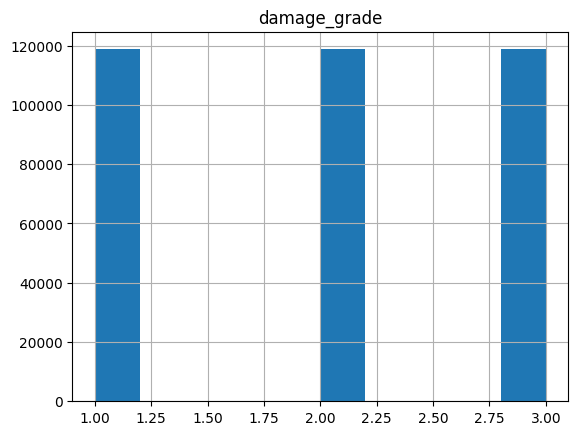

In [67]:
y_train_upsampled.hist()

In [68]:
X_train_upsampled.to_csv('../data/processed/X_train_upsampled.csv')
y_train_upsampled.to_csv('../data/processed/y_train_upsampled.csv')
X_test.to_csv('../data/processed/X_test_from_upsampled.csv')
y_test.to_csv('../data/processed/y_test_from_upsampled.csv')